In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

# NMF (non-negative matrix factorzation)
### 음수가 아닌 특성을 가진 데이터에만 적용할 수 있다.
### 오디어 트랙과 같이 독립된 소스가 여려 곂 겹쳐져 만들어진 데이터를 분류하는데 유용하다.

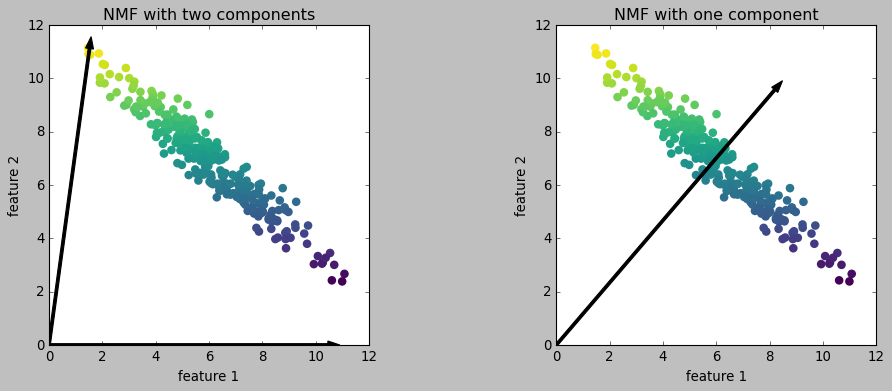

In [3]:
mglearn.plots.plot_nmf_illustration()

In [4]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

# 사람마다 최대 50개의 이미지만 사용
mask = np.zeros(people.target.shape, dtype=bool)

for target in np.unique(people.target) :
    # np.where은 조건식의 맞는 index 배열을 반환한다.
    # mask에서 해당 배열의 50번째 까지만 True 로 변환한다.
    mask[np.where(people.target==target)[0][:50]] = True
    
X_people = people.data[mask]
y_people = people.target[mask]

# 흑백 이미지 값(0~255) 를 (0~1)까지로 조정
X_people /= 255

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, 
                                                    stratify=y_people, random_state=0)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.117647, ..., 0.613072]], dtype=float32))
______________________________________________________nmf_faces - 263.1s, 4.4min


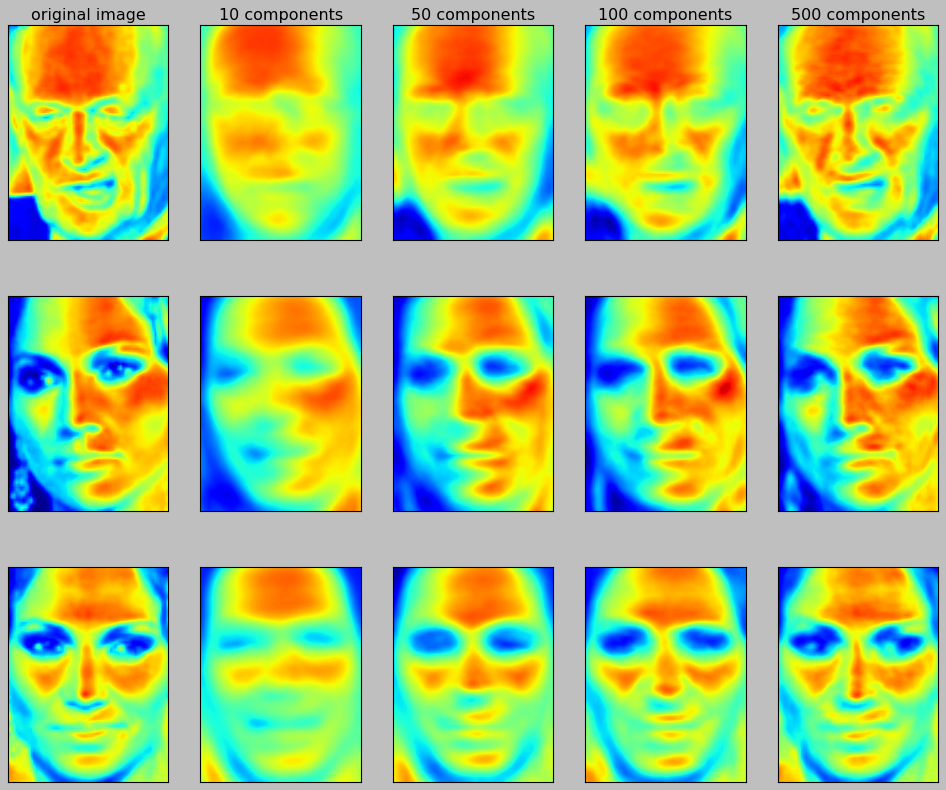

In [9]:
# 오래 걸림 (5m)
# mglearn.plots.plot_nmf_faces(X_train, X_test[:3], image_shape)

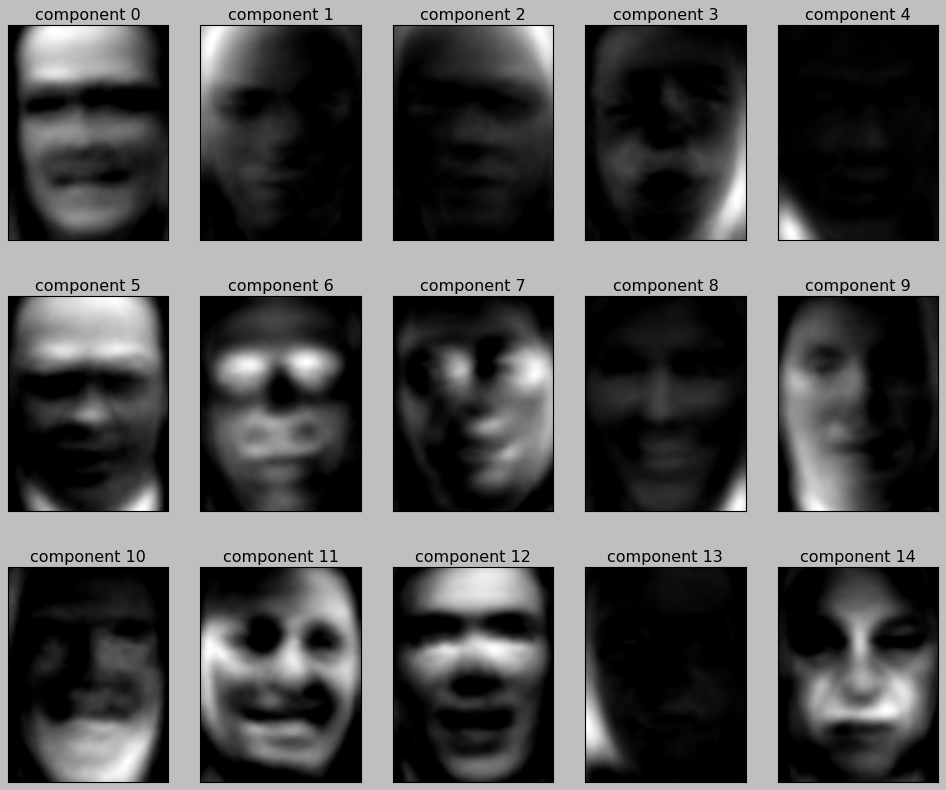

In [11]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, init = "nndsvd", random_state=0,
          max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3,5, figsize = (15,12),
                         subplot_kw={"xticks":(), 'yticks':()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())) :
    ax.imshow(component.reshape(image_shape), cmap = 'gray')
    ax.set_title(f"component {i}")

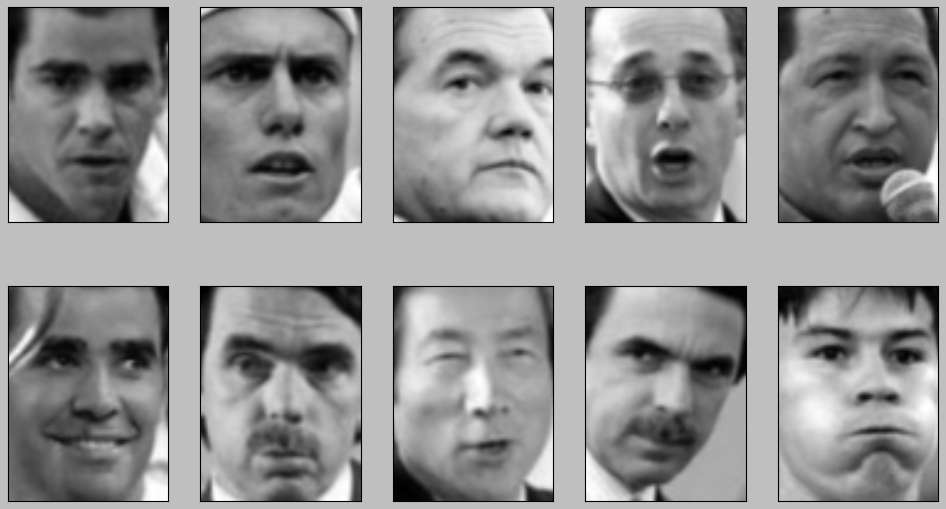

In [20]:
compn = 3
# 4번째 성분의 값을 크기 순으로 정렬해서 가장 큰 특징을 가진 10개의 데이터를 보여준다.
idxs = np.argsort(X_train_nmf[:,compn])[::-1]

fig, axes = plt.subplots(2,5, figsize = (15,8), subplot_kw={"xticks":(), "yticks":()})

for i, (idx, ax) in enumerate(zip(idxs, axes.ravel())) :
    ax.imshow(X_train[idx].reshape(image_shape), cmap = 'gray')
    

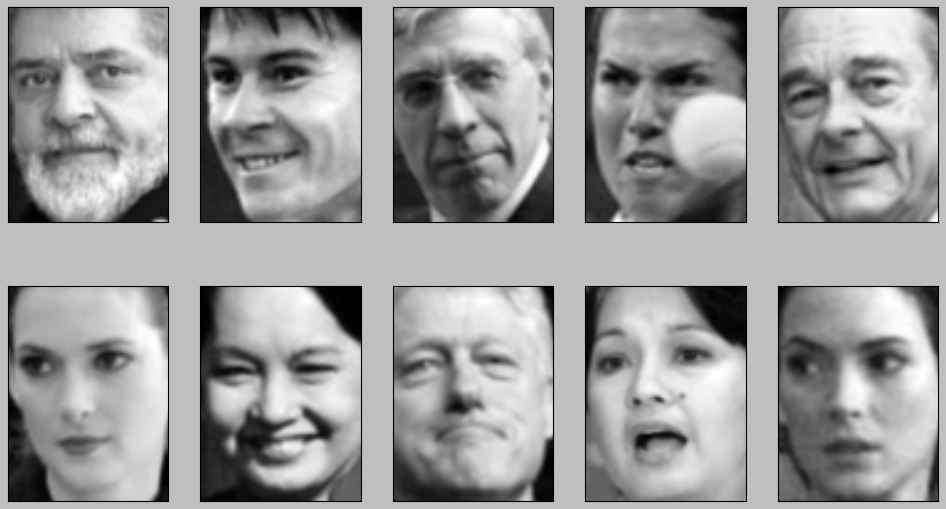

In [21]:
compn = 7
# 8번째 성분의 값을 크기 순으로 정렬해서 가장 큰 특징을 가진 10개의 데이터를 보여준다.
idxs = np.argsort(X_train_nmf[:,compn])[::-1]

fig, axes = plt.subplots(2,5, figsize = (15,8), subplot_kw={"xticks":(), "yticks":()})

for i, (idx, ax) in enumerate(zip(idxs, axes.ravel())) :
    ax.imshow(X_train[idx].reshape(image_shape), cmap = 'gray')
    

### 4번째 주성분을 가진 데이터들은 오른쪽, 8번째 주성분을 가진 데이터들은 왼쪽을 쳐다보고 있다.

Text(0, 0.5, 'signal')

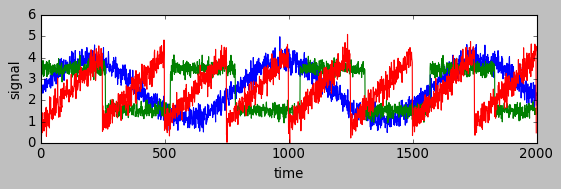

In [26]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(8,2))
plt.plot(S)
plt.xlabel("time")
plt.ylabel('signal')

In [29]:
# 3개의 측정 신호가 랜덤하게 섞인 100개의 측정 데이터를 만든다.
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("측정 데이터의 형태 : ", X.shape)


측정 데이터의 형태 :  (2000, 100)


In [30]:
# 100개의 측정 데이터를 nmf를 이용해 3개의 측정데이터로 축소한다.
nmf = NMF(n_components=3, init='nndsvd', random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)
print("복원된 신호 데이터의 형태 : ", S_.shape)

복원된 신호 데이터의 형태 :  (2000, 3)


In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
H = pca.fit_transform(X)

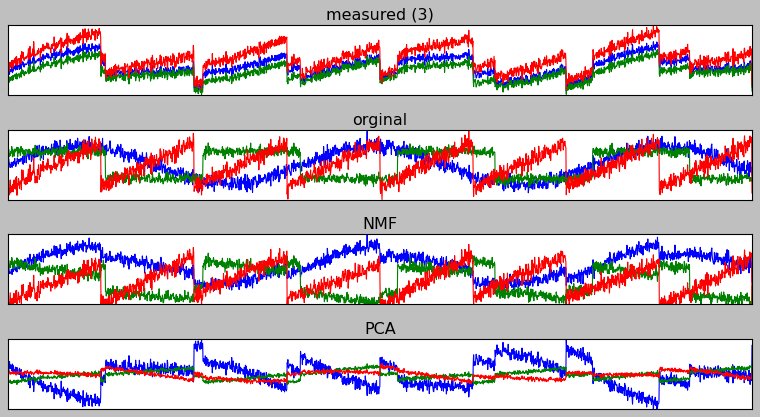

In [36]:
models = [X,S,S_,H] 
names = ['measured (3)', 'orginal', 'NMF', 'PCA']

fig, axes = plt.subplots(4, figsize=(12,6), gridspec_kw={'hspace' : .5},
                         subplot_kw={"xticks":(), "yticks":()})

for model, name, ax in zip(models, names, axes) :
    ax.set_title(name)
    ax.plot(model[:,:3])

### 주의 사항 :
### NMF 로 생성된 성분은 순서가 존재하지 않음을 유념하자 (위 데이터에서는 우연히 원본과 생성된 성분의 순서가 같았다.)